## Cleaning the data

Before diving into the analysis, it's essential to ensure that the data is clean and free from any inconsistencies.

## Dataset Variables

The dataset consists of the following variables:

- **Property Type**: The type or category of the property (e.g., apartment, house).
- **Address**: The specific address or location of the property.
- **Region**: The broader region or district where the property is located.
- **Rent**: The monthly rent price for the property.
- **Total Rent**: The total rent, which might include additional costs or fees.
- **Area**: The size of the property in square meters.
- **Rooms**: The number of bedrooms in the property.
- **Bathrooms**: The number of bathrooms in the property.
- **Garage**: Indicates whether the property has a garage (1 for Yes, 0 for No).
- **Furnished**: Indicates whether the property is furnished (1 for Yes, 0 for No).

With a clear understanding of these variables, we can now proceed with the data cleaning and initial analyses.


In [9]:
import pandas as pd
import os

def clean_data(filename):
    """
    Load and clean the housing data.

    :param filename: Name of the CSV file containing housing data.
    :return: A cleaned DataFrame.
    """
    
    # Construct the full path to the data
    data_path = os.path.join("C:\\", "github", "Rio-Housing-Scrapper", "Data(29-09_2023)", filename)
    
    # Import the data
    df = pd.read_csv(data_path)

    # Remove duplicated rows
    df_cleaned = df.drop_duplicates().reset_index(drop=True)

    # Rename columns
    df_cleaned = df_cleaned.rename(columns={'aluguel': 'rent', 'aluguel_total': 'total_rent'})

    # Replace NaN with 0 in the "garage" column
    df_cleaned['garage'].fillna(0, inplace=True)

    # Convert values in the "furnished" column to 1 (True) and 0 (False)
    df_cleaned['furnished'] = df_cleaned['furnished'].astype(int)

    # Remove ", Rio de Janeiro" from the "region" column
    df_cleaned['region'] = df_cleaned['region'].str.replace(", Rio de Janeiro", "")

    return df_cleaned

def suggested_correction(value):
    # Multiplicando por 1000 para eliminar o ponto decimal
    no_dot = int(value * 1000)
    
    # Se tiver 6 dígitos, divide por 1000
    if 100000 <= no_dot < 1000000:
        return no_dot // 1000
    
    return no_dot

# Usage example
df_cleaned = clean_data("housing_data.csv")

# Applyng the correction 
df_cleaned["rent"] = df_cleaned["rent"].apply(suggested_correction)
df_cleaned["total_rent"] = df_cleaned["total_rent"].apply(suggested_correction)


# Renaming columns to English for better understanding in the analysis
df_cleaned = df_cleaned.rename(columns={
    'type_of_property': 'Property Type',
    'address': 'Address',
    'region': 'Region',
    'rent': 'Rent',
    'total_rent': 'Total Rent',
    'area': 'Area',
    'rooms': 'Rooms',
    'bathrooms': 'Bathrooms',
    'garage': 'Garage',
    'furnished': 'Furnished'
})

# Showing some rows
df_cleaned

,Property Type,Address,Region,Rent,Total Rent,Area,Rooms,Bathrooms,Garage,Furnished
0,Apartamento,Rua Marechal Bittencourt,Riachuelo,700,1368,55,2,1,1.0,0
1,Apartamento,Rua Tonelero,Copacabana,4200,6012,140,5,2,1.0,1
2,Apartamento,Rua Correa Dutra,Flamengo,2450,3198,53,1,1,0.0,0
3,Apartamento,Rua Theodor Herzl,Botafogo,3300,4075,61,2,1,0.0,0
4,Apartamento,Rua Hilário de Gouvêia,Copacabana,1750,2649,27,1,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2568,Studio e kitnet,Avenida Flamboyants da Península,Barra da Tijuca,9375,12290,135,1,2,0.0,1
2569,Apartamento,Rua Homem de Melo,Tijuca,3840,4906,180,3,2,1.0,1
2570,Casa em condomínio,Rua Lage do Muriaé,Taquara,4840,5562,306,3,4,0.0,0
2571,Casa,Avenida Arapogi,Braz de Pina,2910,3025,181,4,2,0.0,0


In [10]:
## saving the data_frame
path = r"C:\github\Rio-Housing-Scrapper\Data(29-09_2023)\housing_data_set.csv"
df_cleaned.to_csv(path, decimal=".")

# Descriptive Statistics

**Rent**: The average rent is approximately R$2,275. The minimum rent is R$500, and the maximum is R$15,000. 50% of the properties have a rent of up to R$1,550.

**Total Rent**: On average, the total rent (which might include other fees) is approximately R$3,017. The minimum total rent is R$519, and the maximum is R$22,190.

**Area**: The average area of the properties is around 90 m². However, there seems to be a potential outlier, with a maximum area of 33,800 m².

**Rooms**: Most properties have 1 or 2 rooms. The maximum number of rooms in the dataset is 6.

**Bathrooms**: The majority of properties have 1 bathroom. Some properties have up to 5 bathrooms.

**Garage**: Approximately 45% of the properties have a garage.

**Furnished**: About 14.8% of the properties are furnished.




In [11]:
df_cleaned.describe()

,Rent,Total Rent,Area,Rooms,Bathrooms,Garage,Furnished
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,2275.362612,3016.850758,90.324524,2.017101,1.521959,0.453556,0.148076
std,1990.396514,2576.633501,666.653305,0.805127,0.757546,0.497935,0.355245
min,500.000000,519.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1100.000000,1477.000000,50.000000,1.000000,1.000000,0.000000,0.000000
50%,1550.000000,2122.000000,65.000000,2.000000,1.000000,0.000000,0.000000
75%,2650.000000,3503.000000,90.000000,2.000000,2.000000,1.000000,0.000000
max,15000.000000,22190.000000,33800.000000,6.000000,5.000000,1.000000,1.000000


## Distribution of Property Types

__Apartamento (Apartment)__ is the most common property type listed, by a significant margin. \
Other property types like __Casa de Condomínio__ (House in Condominium) and __Casa (House)__ have relatively fewer listings.

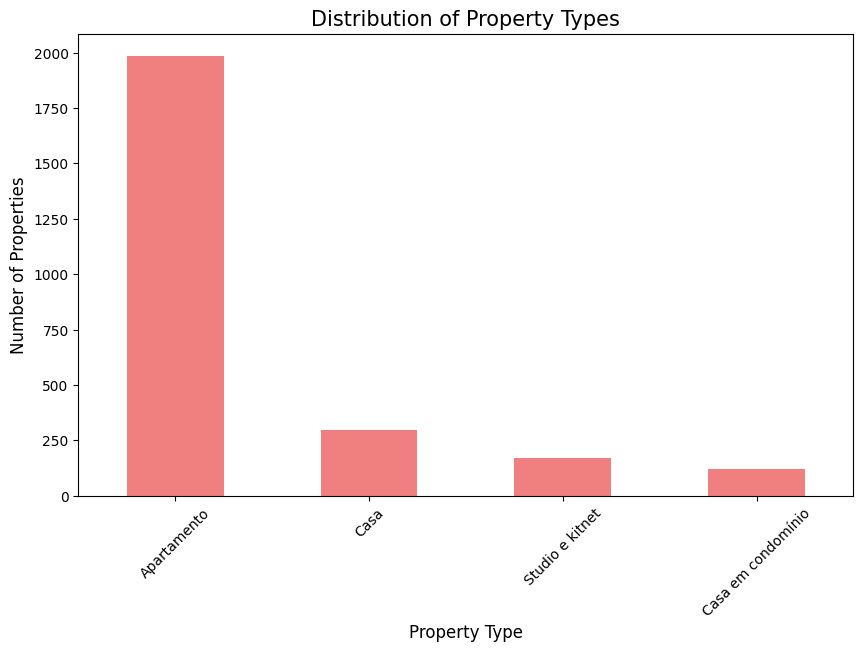

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Property Types
property_type_distribution = df_cleaned['Property Type'].value_counts()

plt.figure(figsize=(10, 6))
property_type_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Property Types', fontsize=15)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Distribution of rents:

The majority of properties have rents in the lower range, with a peak around R$1,000 to R$2,000.
There are fewer properties with very high rents, making the distribution right-skewed. This indicates that while most properties are more affordable, there are some high-end properties with significantly higher rents.

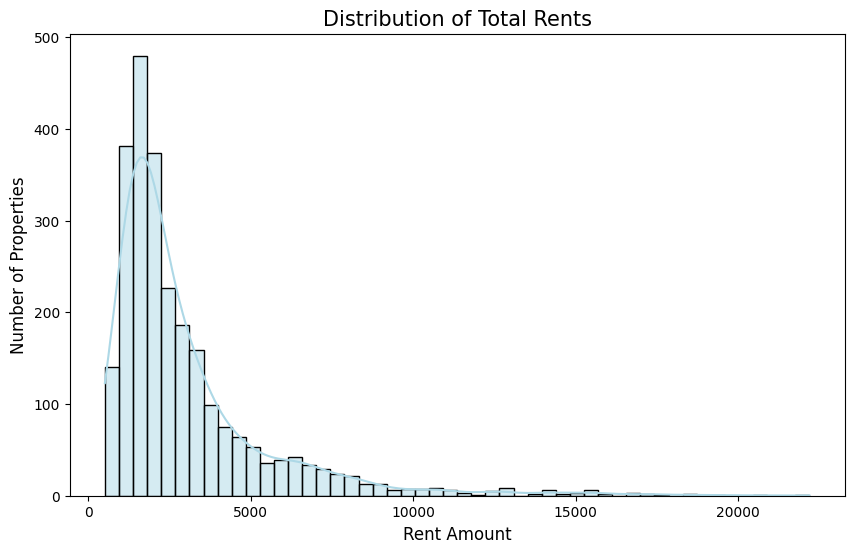

In [13]:
# 2. Distribution of Rents
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Total Rent'], bins=50, color='lightblue', kde=True)
plt.title('Distribution of Total Rents', fontsize=15)
plt.xlabel('Rent Amount', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.show()

## Distribution of the Number of Rooms

A significant number of properties have 1 room, indicating a prevalence of studio or single-bedroom properties. 
Properties with 2 rooms are also common, followed by those with 3 rooms.
As the number of rooms increases, the number of available properties decreases, with very few properties having more than 4 rooms.

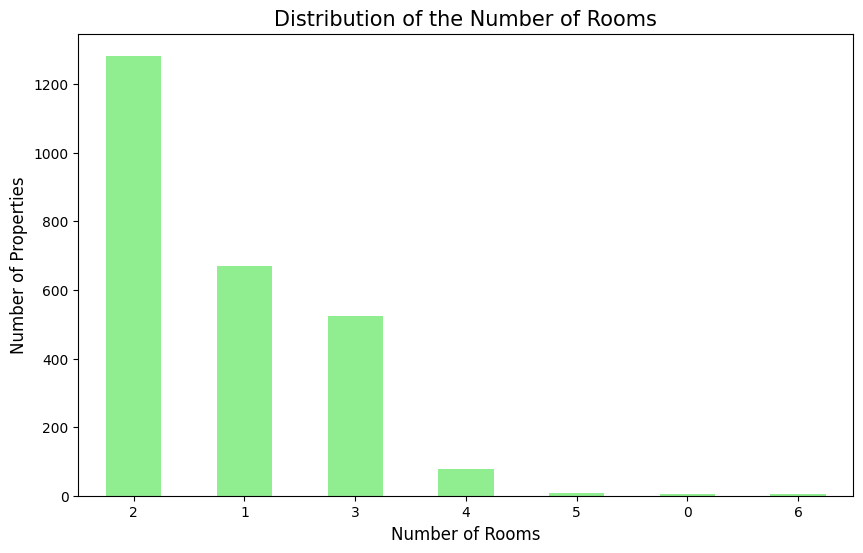

In [14]:
# 3. Distribution of the Number of Rooms
room_distribution = df_cleaned['Rooms'].value_counts()

plt.figure(figsize=(10, 6))
room_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of the Number of Rooms', fontsize=15)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=0)
plt.show()

## Distribution of Pop Regions

__Copacabana__ a famous region from Rio de Janeiro has the most number of properties. 

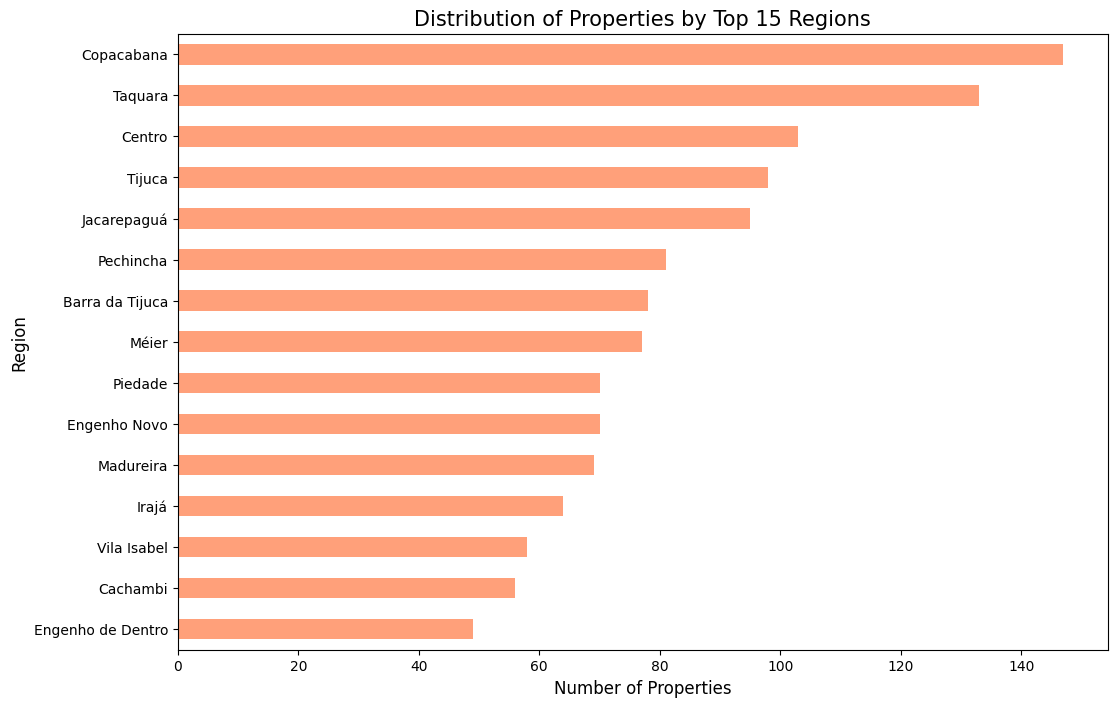

In [15]:
# 4. Distribution of Regions

# Select the top 15 regions
top_15_regions = df_cleaned['Region'].value_counts().head(15)

plt.figure(figsize=(12, 8))
top_15_regions.plot(kind='barh', color='lightsalmon')
plt.title('Distribution of Properties by Top 15 Regions', fontsize=15)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the region with the most properties at the top
plt.show()


## Correlation Between Features

__Rent & Total Rent__: These two features have a strong positive correlation, which is expected. As the base rent of a property increases, the total rent (which might include additional fees) will likely increase as well. 

__Rooms & Area__: There's a positive correlation between the number of rooms and the area of the property. This makes sense as properties with more rooms typically have a larger area.

__Rooms & Bathrooms__: Similarly, there's a positive correlation between the number of rooms and bathrooms. Larger properties (with more rooms) tend to have more bathrooms.

__Rent & Rooms, Rent & Bathrooms__: There are moderate positive correlations here, indicating that as the number of rooms or bathrooms increases, the rent might also increase.

These correlations provide insights into the relationships between different property attributes. For instance, properties with more rooms and bathrooms are likely to be larger (in terms of area) and have higher rents.

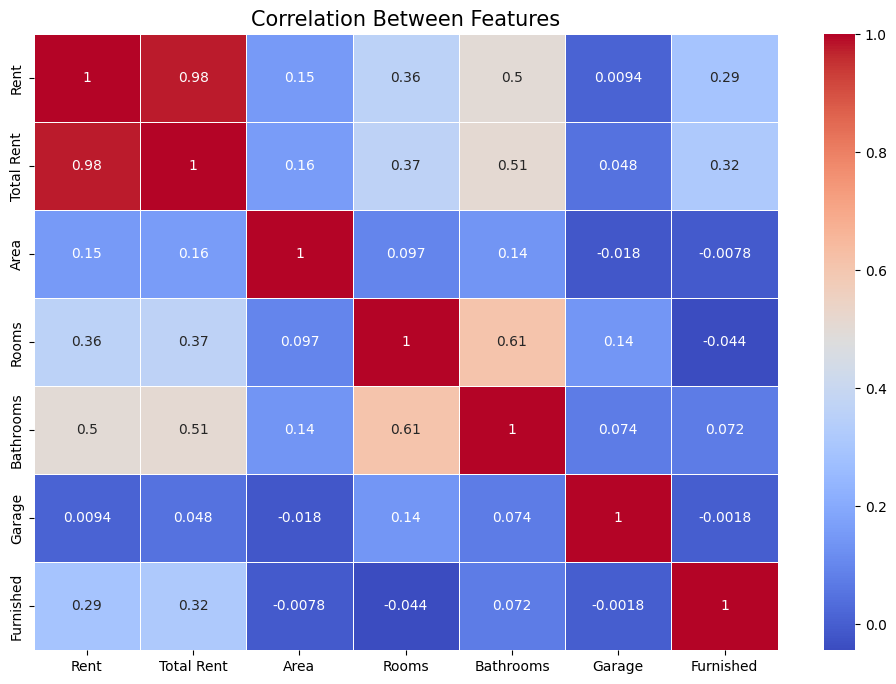

In [16]:
# 5. Correlation Between Features
correlation_matrix = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Between Features', fontsize=15)
plt.show()


## Continuous Variable and Outlier

I made the decision to exclude a rental property with an area of 35,000 square meters from our machine learning model for predicting total rental costs. This property stood out as an outlier due to its exceptionally large size, and it was the only one of its kind available for rent. Including it in the model could introduce bias and negatively impact the accuracy of our predictions. By removing it, we aim to improve the model's performance and ensure that it provides more accurate estimates for a broader range of rental properties with more typical sizes. This decision aligns with our goal of optimizing the precision of our rental cost prediction model.

Certainly, in the scatter plots, we can observe a correlation between greater area and higher total rent. Additionally, we can see that houses with more rooms tend to have higher total rent compared to those with fewer rooms. The same pattern holds true for bathrooms, meaning that a house with 4 bathrooms is generally more expensive than the least expensive house with 2 bathrooms or 3 bathrooms. Similarly, when it comes to area and the number of bathrooms, we notice a similar trend where larger properties with more bathrooms tend to command higher rental prices.


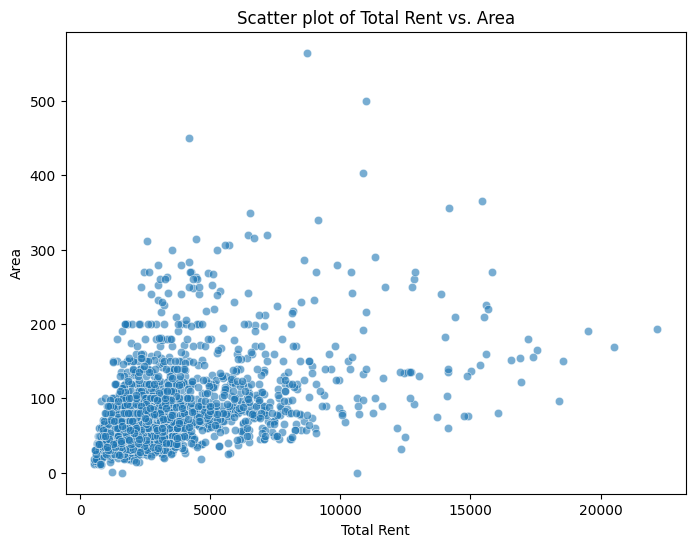

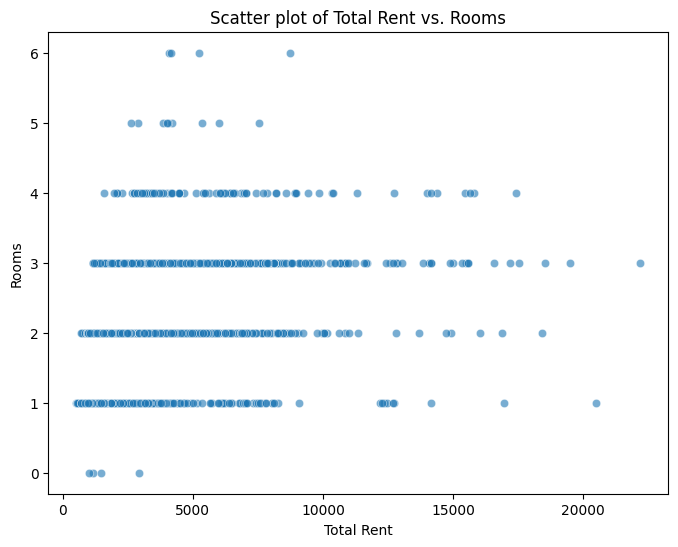

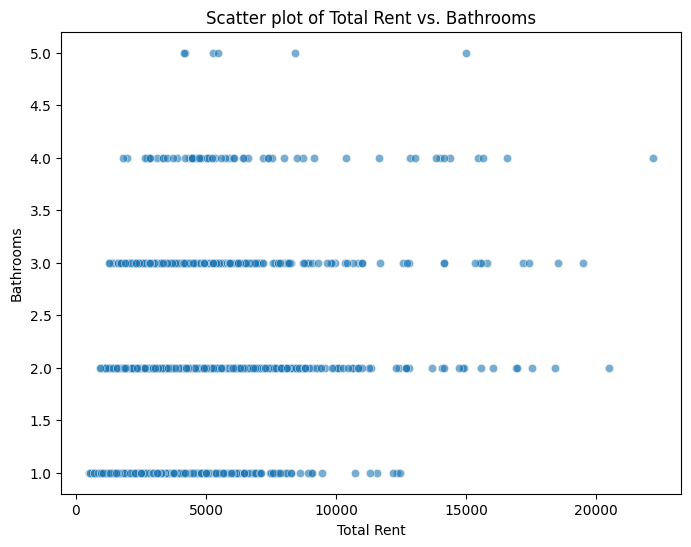

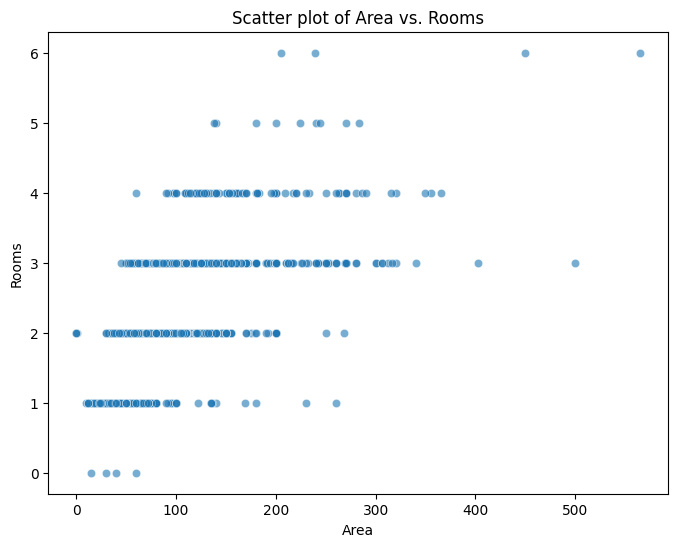

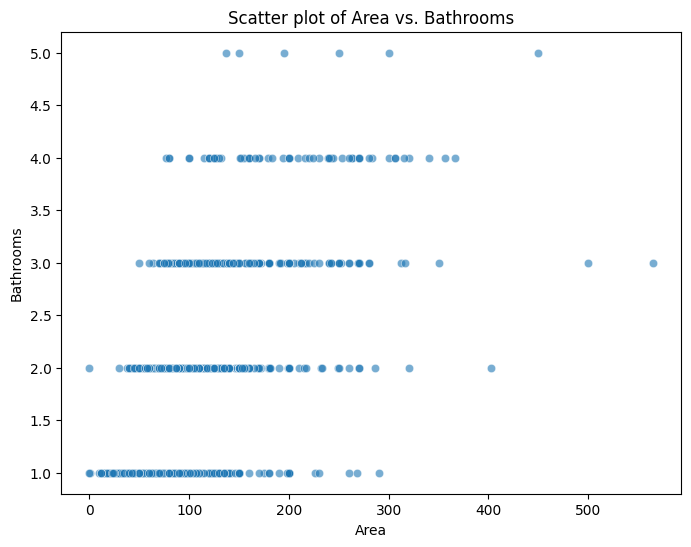

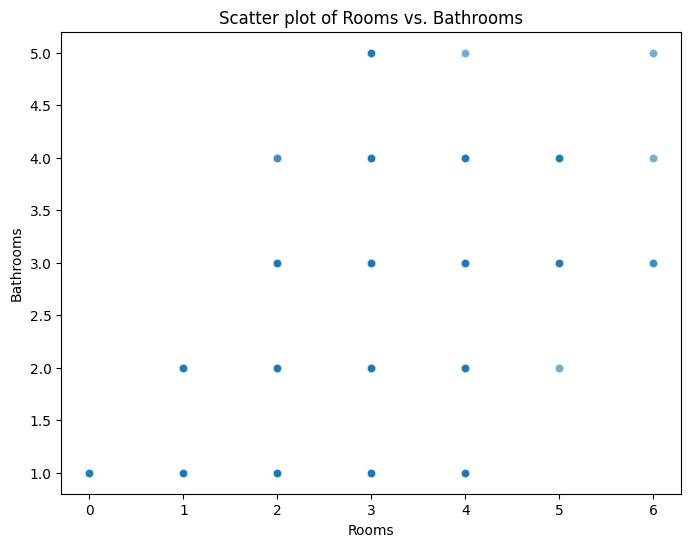

In [24]:
# Deleting the outlier
df_cleaned = df_cleaned[df_cleaned['Area'] <= 10000]

# Selecting continuous variable 
continuous_variables = ['Total Rent', 'Area', 'Rooms', 'Bathrooms']

# Loop para criar gráficos de dispersão para todas as combinações de variáveis contínuas
for i in range(len(continuous_variables)):
    for j in range(i + 1, len(continuous_variables)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_cleaned[continuous_variables[i]], y=df_cleaned[continuous_variables[j]], alpha=0.6)
        plt.title(f'Scatter plot of {continuous_variables[i]} vs. {continuous_variables[j]}')
        plt.xlabel(continuous_variables[i])
        plt.ylabel(continuous_variables[j])
        plt.show()

# Saving the final data_set to machine learning        
df_cleaned_final = df_cleaned
df_cleaned_final.to_csv('C:/github/Rio-Housing-Scrapper/Data(29-09_2023)/df_cleaned_final.csv', index=False)
